In [56]:
import numpy as np

X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

In [57]:
X_test

array([[5.9, 3. ],
       [5.3, 3.7],
       [4.8, 3.4],
       [5.5, 3.5],
       [4.6, 3.6],
       [4.8, 3. ],
       [6.1, 2.6],
       [6.9, 3.1],
       [5.1, 3.8],
       [6.7, 2.5],
       [6.5, 3.2],
       [4.6, 3.4],
       [5. , 2. ],
       [6. , 2.2],
       [6. , 2.2],
       [4.5, 2.3],
       [5.7, 3.8],
       [6.9, 3.1],
       [6.4, 3.2],
       [4.4, 3.2]])

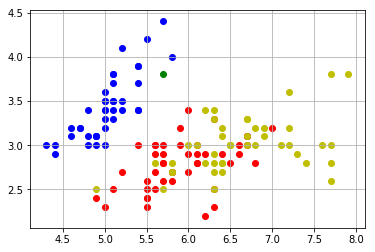

In [3]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1], c='b')
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], c='r')
plt.scatter(X_train[y_train==2][:,0], X_train[y_train==2][:,1], c='y')
plt.scatter(X_test[0], X_test[1], c='g')
plt.grid()
plt.show()

## 2. Find distance between train data and test data

#### (method 1) find distance using list

###### append in list

In [3]:
a = [1,2]
print(a)

a.append(3)
print(a)

[1, 2]
[1, 2, 3]


###### Compute distance using 'append'

In [12]:
dist = []
for i in range(len(X_train)):
    dist.append(np.sqrt(np.sum((X_train[i] - X_test)**2)))
print(dist)

[1.3038404810405295, 0.49999999999999983, 1.1045361017187258, 1.5132745950421556, 1.3416407864998738, 1.118033988749895, 1.431782106327635, 0.6708203932499374, 1.2083045973594568, 2.06155281280883, 1.0, 1.2041594578792292, 0.8544003745317529, 1.1313708498984758, 1.2999999999999998, 1.2806248474865696, 1.8357559750685815, 0.6324555320336757, 0.9486832980505137, 0.7810249675906652, 1.2806248474865696, 0.9055385138137416, 1.1313708498984758, 1.2529964086141663, 0.4472135954999583, 1.2529964086141672, 0.7810249675906652, 1.1045361017187258, 1.6763054614240207, 1.5264337522473745, 1.1401754250991376, 1.16619037896906, 0.6403124237432848, 0.8944271909999155, 0.8246211251235319, 0.7211102550927976, 0.6403124237432848, 0.8944271909999155, 2.2, 0.7999999999999998, 0.31622776601683783, 1.22065556157337, 0.6708203932499374, 1.431782106327635, 1.6124515496597098, 1.22065556157337, 1.4866068747318502, 1.1045361017187258, 1.360147050873544, 1.118033988749895, 1.414213562373095, 1.1045361017187258, 0

In [7]:
print(X_train[1], X_test)

[5.4 3.4] [5.7 3.8]


In [4]:
#실습 (+np.sum axis 홈페이지)

In [5]:
# other way to evaluate distance
np.linalg.norm(X_train[0]-X_test)

1.3038404810405295

In [6]:
dist = []
for i in range(len(X_train)):
    dist.append(np.sqrt(np.sum((X_train[i] - X_test)**2)))
    #dist.append(np.linalg.norm(X_train[i] - X_test))

![image](./image/image4.png)

#### (method 2) find distance using broadcasting in numpy

![image](./image/image5.png)

In [24]:
dist = np.sqrt(np.sum((X_train - X_test)**2, axis=1))

In [21]:
len(np.sum((X_train - X_test)**2, axis=1))

130

In [7]:
#실습
#a = np.sqrt(np.sum((X_train - X_test)**2, axis=1))
#a==dist

In [8]:
#broadcasting in numpy
dist = np.sqrt(np.sum((X_train - X_test)**2, axis=1)) 

In [25]:
print(len(dist), max(dist), min(dist))

130 2.33238075793812 0.22360679774997896


## 3-1. Find its closest data (k=1)

In [26]:
print(np.argmin(dist))

86


In [27]:
X_train[86]

array([5.8, 4. ])

In [28]:
a = np.array([10,2,3])

In [29]:
np.min(a)

2

In [30]:
np.argmin(a)

1

#### plot in 2 dimensional Euclidean space

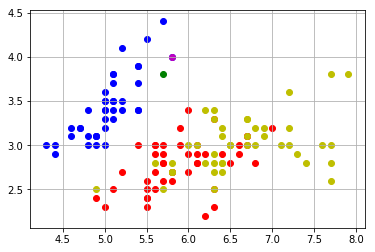

In [11]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1], c='b')
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], c='r')
plt.scatter(X_train[y_train==2][:,0], X_train[y_train==2][:,1], c='y')
plt.scatter(X_test[0], X_test[1], c='g')
plt.scatter(X_train[86][0], X_train[86][1], c='m')
plt.grid()
plt.show()

## 4-1. Classify label of test data

In [31]:
y_train[86]

0.0

In [32]:
y_hat = y_train[86]
print(y_hat)

0.0


#### Check the answer

In [33]:
y_hat == y_test

True

In [34]:
y_test

0.0

## 3-2. Find its 3-nearest data (k=3)

#### argsort in numpy

In [35]:
a = np.array([20,30,10])

print(np.sort(a), np.argsort(a))

[10 20 30] [2 0 1]


In [37]:
np.argsort(a)

array([2, 0, 1], dtype=int64)

#### Find 3-nearest data

In [41]:
np.argsort(dist)[:3]

array([86, 98, 40], dtype=int64)

In [43]:
print(y_train[86], y_train[98], y_train[40])

0.0 0.0 0.0


In [44]:
indices = np.argsort(dist)[:3]

y_near = y_train[indices]
print(y_near, type(y_near))

[0. 0. 0.] <class 'numpy.ndarray'>


#### Plot in 2 dimensional Euclidean space

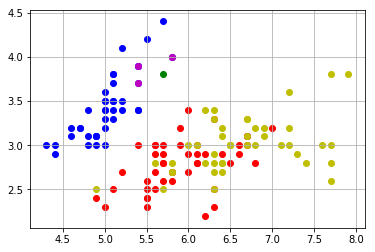

In [16]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1], c='b')
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], c='r')
plt.scatter(X_train[y_train==2][:,0], X_train[y_train==2][:,1], c='y')
plt.scatter(X_test[0], X_test[1], c='g')
plt.scatter(X_train[86][0], X_train[86][1], c='m')
plt.scatter(X_train[98][0], X_train[98][1], c='m')
plt.scatter(X_train[40][0], X_train[40][1], c='m')
plt.grid()
plt.show()

## 4-2. Classify label of test data

#### count in list

In [46]:
a = [1,1,1,2,3]
a.count(3)

1

#### the number of labels of 3-nearest data

In [52]:
y_near = list(y_near)
y_near.count(2)

0

In [18]:
y_near = list(y_near)
y_near.count(0), y_near.count(1), y_near.count(2)

(3, 0, 0)

#### expecting label of test data

In [53]:
np.argmax([y_near.count(0), y_near.count(1), y_near.count(2)])

0

In [54]:
y_hat = np.argmax([y_near.count(0), y_near.count(1), y_near.count(2)])
print(y_hat)

0


#### Check the answer

In [55]:
y_hat == y_test

True

## Exercise

#### find accuracy with 20 test data (k=3)

In [22]:
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

##### (1) find all of classes of 20 test data

##### (2) find accuracy